In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Dropout

In [57]:
#Load Dataset csv melalui drive dan tampilkan data statistik nya
dataset = pd.read_csv('/content/drive/My Drive/Datasets/winequality-white (1).csv', delimiter = ';')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [58]:
#Fungsi yang digunakan untuk melihat sejumlah informasi seperti jumlah data perkolom dan type data nya
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [59]:
#Fungsi untuk menampilkan beberapa data awal, dsni saya gunakan untuk melihat 10 data awal
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae40814390>,
      dtype=object)

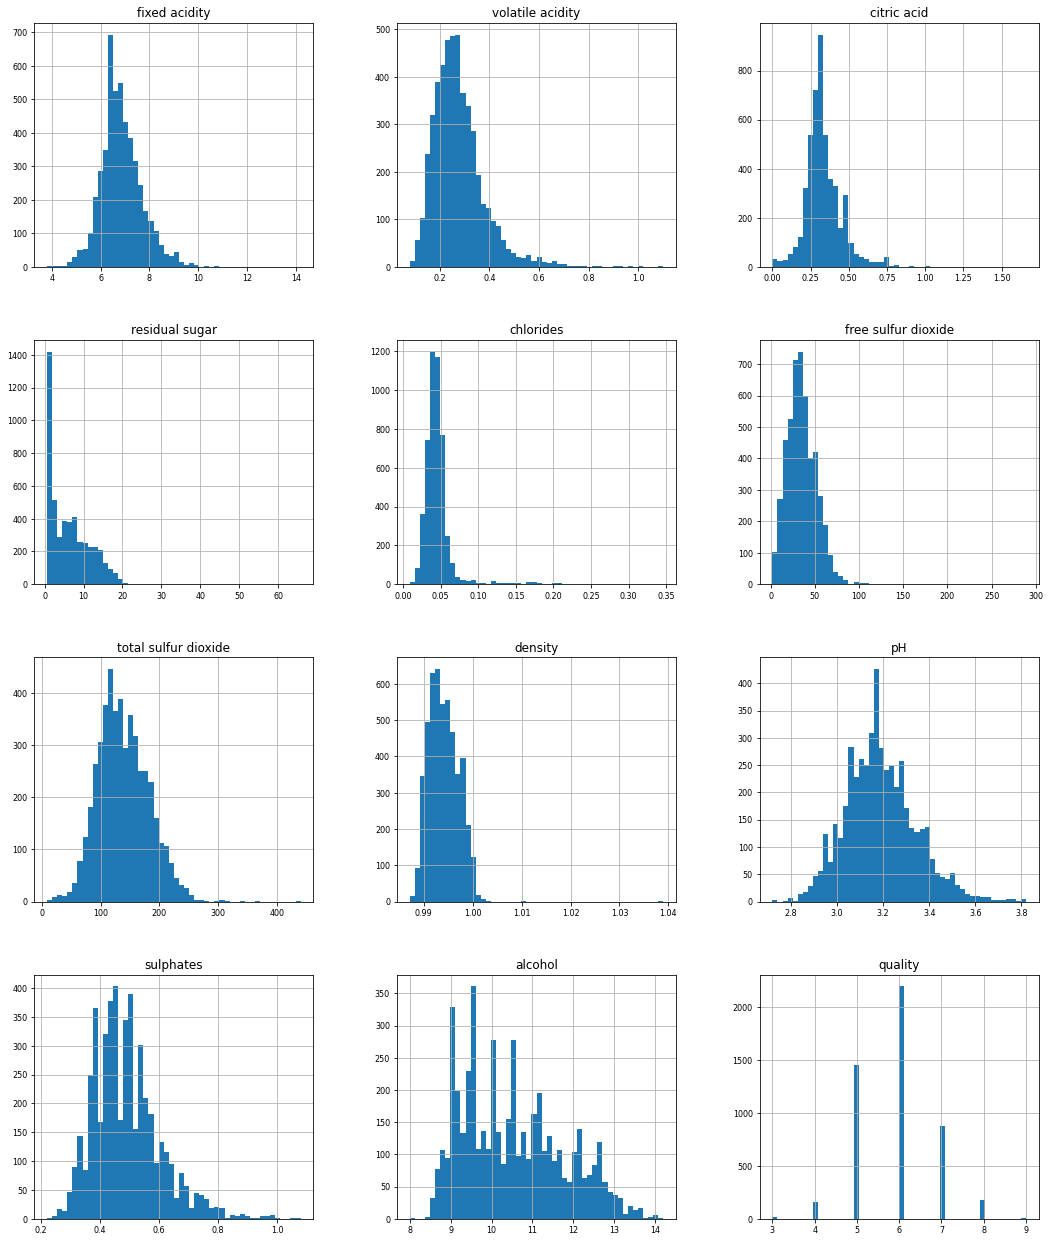

In [60]:
#Dsini kita mencoba melihat histogram pada setiap feature
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

# Corelation

In [61]:
#Untuk melihat korelasi antar feature nya
corr = dataset.corr()

corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


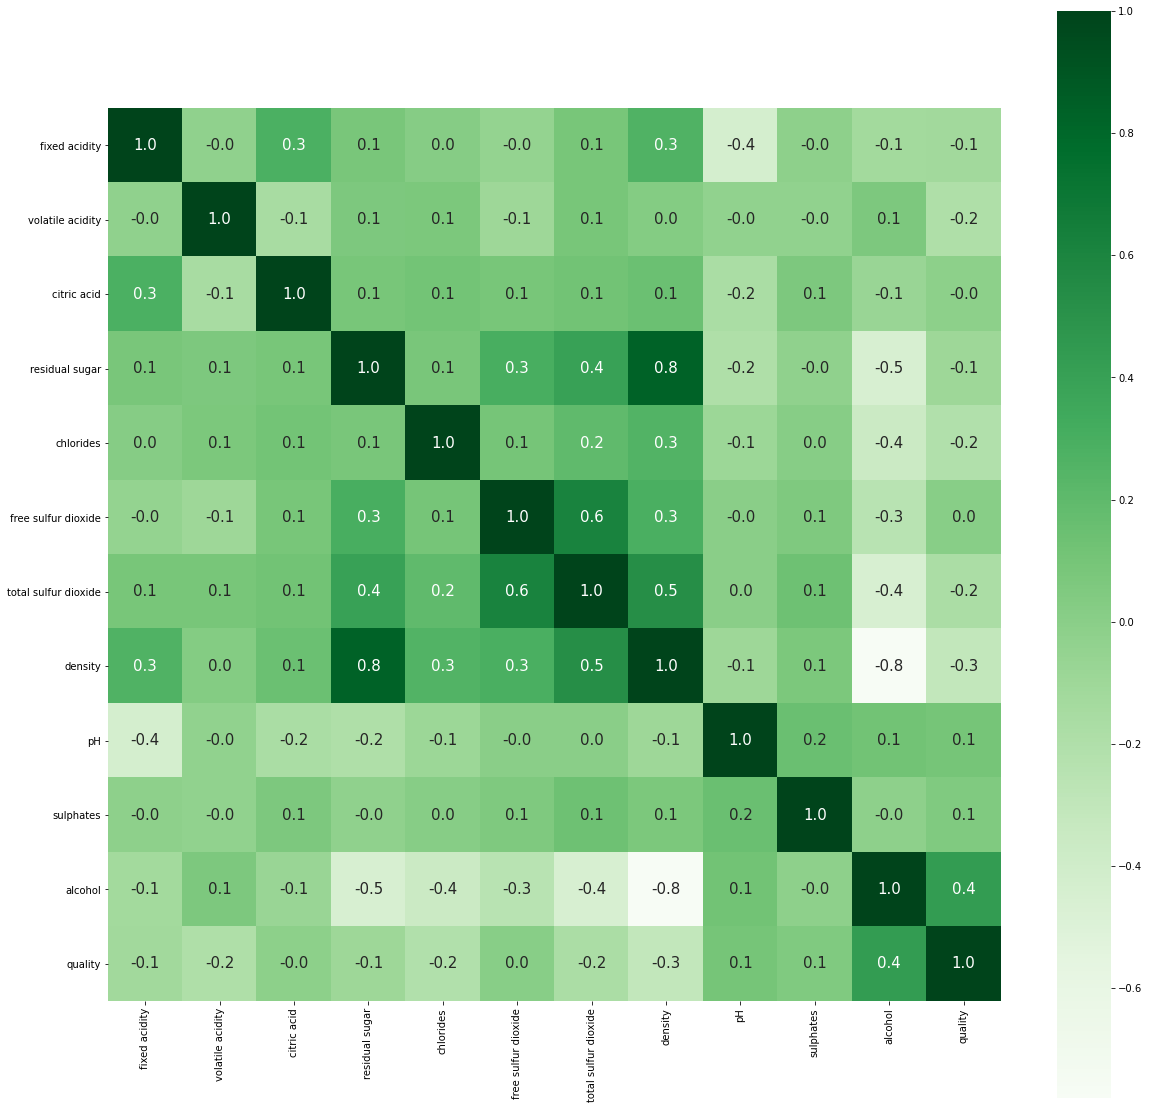

In [62]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

# Preprocessing

In [63]:
label = dataset['quality']
features = dataset.drop(['quality'], axis=1)

In [64]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() #preprocessing menggunakan standard scaler 

features_scaled = scaler.fit_transform(features.values)

In [65]:
from sklearn.model_selection import train_test_split

#split dataset
feature_train, feature_test, label_train, label_test = train_test_split(features_scaled, label, test_size=0.2, random_state=10)

# Deep Learning

Pada Setiap Model dibawah saya menggunakan Epoch 100 dan batch size nya 15

In [105]:
model = Sequential() #masih dengan model sequential
model.add(Dense(64, input_dim=11, kernel_initializer='normal', activation='relu')) # 64 neuron, dan input_dim dengan 11 features
model.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt) #disini untuk loss nya menggunakan metrics MSE dan optimizer SGD

In [106]:
history = model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=15)

Epoch 1/100
262/262 [==============================] - 0s 1ms/step - loss: 3.5079 - val_loss: 0.6025
Epoch 2/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5990 - val_loss: 0.5776
Epoch 3/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5757 - val_loss: 0.5442
Epoch 4/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5624 - val_loss: 0.5429
Epoch 5/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5538 - val_loss: 0.5238
Epoch 6/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5450 - val_loss: 0.5392
Epoch 7/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5423 - val_loss: 0.5162
Epoch 8/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5353 - val_loss: 0.5222
Epoch 9/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5234 - val_loss: 0.5197
Epoch 10/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5168 - val_lo

In [88]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [107]:
#menampilkan hasil evaluasi nilai loss dari model
loss = model.evaluate(feature_test, label_test, verbose=2)

print("Test loss:", loss)

31/31 - 0s - loss: 0.4850
Test loss: 0.48504266142845154


In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = model.predict(feature_test)

predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.48504261392746184
MAE (Mean Absolute Error) 0.5451388599921246
r^2 score 0.3641997796895836
RMSE (Root Mean Squared Error 0.6964500082040791


In [91]:
#membuat dataframe dari model
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
66,0.495062,0.493160,66
62,0.491529,0.493655,62
39,0.505223,0.494254,39
93,0.491058,0.494805,93
91,0.489510,0.495164,91
...,...,...,...
3,0.564162,0.571970,3
64,0.494436,0.583705,64
1,0.586533,0.598372,1
16,0.531781,0.659995,16


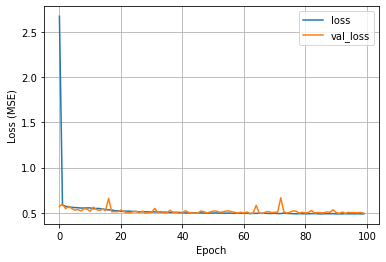

In [92]:
plot_loss(history) # epoch vs loss graph

# Deeper Model

In [130]:
deeper_model = Sequential()
deeper_model.add(Dense(64, input_dim=11, kernel_initializer='normal', activation='relu')) # layer pertama menggunakan 64 neuron activation relu
deeper_model.add(Dense(96, kernel_initializer='normal', activation='relu')) #layer kedua menggunakan 96 neuron
deeper_model.add(Dense(128, kernel_initializer='normal', activation='relu')) #layer ketiga menggunakan 96 neuron
deeper_model.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)
deeper_model.compile(loss='mean_squared_error', optimizer=opt) #disini untuk loss nya menggunakan metrics MSE dan optimizer SGD

history = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=15)

Epoch 1/100
262/262 [==============================] - 0s 2ms/step - loss: 3.5550 - val_loss: 0.6121
Epoch 2/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5969 - val_loss: 0.5827
Epoch 3/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5567 - val_loss: 0.5219
Epoch 4/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5345 - val_loss: 0.5069
Epoch 5/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5207 - val_loss: 0.4975
Epoch 6/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5115 - val_loss: 0.5008
Epoch 7/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5023 - val_loss: 0.5003
Epoch 8/100
262/262 [==============================] - 0s 1ms/step - loss: 0.4979 - val_loss: 0.4895
Epoch 9/100
262/262 [==============================] - 0s 1ms/step - loss: 0.4914 - val_loss: 0.4895
Epoch 10/100
262/262 [==============================] - 0s 1ms/step - loss: 0.4858 - val_lo

In [131]:
#menampilkan hasil evaluasi nilai loss dari model
loss = deeper_model.evaluate(feature_test, label_test, verbose=2)

print("Test loss:", loss)

31/31 - 0s - loss: 0.4978
Test loss: 0.4977602958679199


In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.49776027826497526
MAE (Mean Absolute Error) 0.541092620577131
r^2 score 0.34752929846701164
RMSE (Root Mean Squared Error 0.7055212812275582


In [133]:
#membuat dataframe dari model
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
73,0.350450,0.462922,73
81,0.337298,0.466920,81
70,0.354258,0.468593,70
46,0.405983,0.471175,46
97,0.308408,0.472014,97
...,...,...,...
88,0.323492,0.517224,88
77,0.347479,0.519126,77
2,0.556742,0.521945,2
1,0.596949,0.582705,1


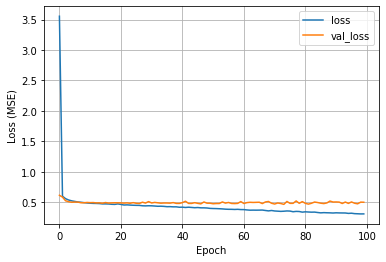

In [134]:
plot_loss(history) # epoch vs loss graph

# Wider Model

In [114]:
wider_model = Sequential()
wider_model.add(Dense(256, input_dim=11, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)
wider_model.compile(loss='mean_squared_error', optimizer=opt)

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=15)

Epoch 1/100
262/262 [==============================] - 0s 1ms/step - loss: 2.9015 - val_loss: 0.6644
Epoch 2/100
262/262 [==============================] - 0s 1ms/step - loss: 0.6602 - val_loss: 0.5594
Epoch 3/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5829 - val_loss: 0.5574
Epoch 4/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5568 - val_loss: 0.5201
Epoch 5/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5345 - val_loss: 0.5195
Epoch 6/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5287 - val_loss: 0.5193
Epoch 7/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5124 - val_loss: 0.5052
Epoch 8/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5047 - val_loss: 0.5021
Epoch 9/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5023 - val_loss: 0.5012
Epoch 10/100
262/262 [==============================] - 0s 1ms/step - loss: 0.4967 - val_lo

In [115]:
#menampilkan hasil evaluasi nilai loss dari model
loss = wider_model.evaluate(feature_test, label_test, verbose=2)

print("Test loss:", loss)

31/31 - 0s - loss: 0.4775
Test loss: 0.4775314927101135


In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.47753147249542977
MAE (Mean Absolute Error) 0.5394406829561506
r^2 score 0.37404548239722835
RMSE (Root Mean Squared Error 0.6910365203774904


In [117]:
#membuat dataframe dari model
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
96,0.387434,0.459020,96
79,0.395366,0.463355,79
78,0.401346,0.463437,78
95,0.377783,0.463904,95
94,0.378888,0.465227,94
...,...,...,...
4,0.534452,0.519504,4
3,0.556807,0.520107,3
2,0.582942,0.557449,2
1,0.660234,0.559371,1


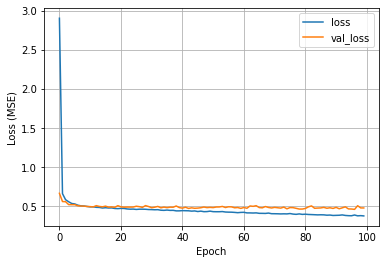

In [118]:
plot_loss(history) # epoch vs loss graph

# SuperWide Model

In [119]:
superwide_model = Sequential()
superwide_model.add(Dense(1028, input_dim=11, kernel_initializer='normal', activation='relu'))
superwide_model.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)
superwide_model.compile(loss='mean_squared_error', optimizer=opt)

history = superwide_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=15)

Epoch 1/100
262/262 [==============================] - 0s 1ms/step - loss: 2.5618 - val_loss: 0.6904
Epoch 2/100
262/262 [==============================] - 0s 1ms/step - loss: 0.6266 - val_loss: 0.5383
Epoch 3/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5391 - val_loss: 0.5217
Epoch 4/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5122 - val_loss: 0.5033
Epoch 5/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5002 - val_loss: 0.4991
Epoch 6/100
262/262 [==============================] - 0s 1ms/step - loss: 0.4896 - val_loss: 0.5402
Epoch 7/100
262/262 [==============================] - 0s 1ms/step - loss: 0.4824 - val_loss: 0.4917
Epoch 8/100
262/262 [==============================] - 0s 1ms/step - loss: 0.4733 - val_loss: 0.4881
Epoch 9/100
262/262 [==============================] - 0s 1ms/step - loss: 0.4660 - val_loss: 0.4840
Epoch 10/100
262/262 [==============================] - 0s 1ms/step - loss: 0.4649 - val_lo

In [120]:
#menampilkan hasil evaluasi nilai loss dari model
loss = superwide_model.evaluate(feature_test, label_test, verbose=2)

print("Test loss:", loss)

31/31 - 0s - loss: 0.4510
Test loss: 0.45097288489341736


In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = superwide_model.predict(feature_test)

predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.4509729115266415
MAE (Mean Absolute Error) 0.5192777553383185
r^2 score 0.4088587924657092
RMSE (Root Mean Squared Error 0.6715451671530676


In [122]:
#membuat dataframe dari model
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
90,0.328620,0.444232,90
67,0.338517,0.445623,67
74,0.344432,0.447385,74
59,0.353680,0.447475,59
91,0.317850,0.448289,91
...,...,...,...
75,0.330895,0.523663,75
31,0.404754,0.534403,31
1,0.626615,0.538275,1
5,0.489650,0.540214,5


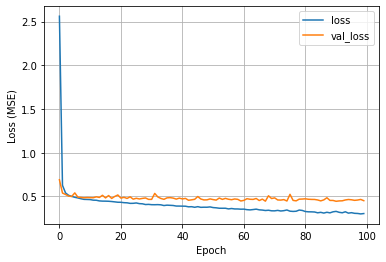

In [123]:
plot_loss(history) # epoch vs loss graph

# Beberapa Optimizer

In [150]:


wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=11, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

# opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer='adam')

wider_model_tuned.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 20)                240       
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 21        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [151]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=15)

Epoch 1/100
262/262 [==============================] - 0s 1ms/step - loss: 23.1990 - val_loss: 6.4197
Epoch 2/100
262/262 [==============================] - 0s 1ms/step - loss: 3.0776 - val_loss: 1.8863
Epoch 3/100
262/262 [==============================] - 0s 1ms/step - loss: 1.6259 - val_loss: 1.2229
Epoch 4/100
262/262 [==============================] - 0s 1ms/step - loss: 1.1348 - val_loss: 0.8917
Epoch 5/100
262/262 [==============================] - 0s 1ms/step - loss: 0.8694 - val_loss: 0.7269
Epoch 6/100
262/262 [==============================] - 0s 1ms/step - loss: 0.7270 - val_loss: 0.6371
Epoch 7/100
262/262 [==============================] - 0s 1ms/step - loss: 0.6508 - val_loss: 0.5822
Epoch 8/100
262/262 [==============================] - 0s 1ms/step - loss: 0.6071 - val_loss: 0.5620
Epoch 9/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5809 - val_loss: 0.5567
Epoch 10/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5661 - val_l

In [152]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
49,0.504678,0.494678,49
71,0.503227,0.496375,71
37,0.510844,0.496879,37
93,0.501591,0.497494,93
48,0.503015,0.497624,48
...,...,...,...
4,0.869354,0.726900,4
3,1.134823,0.891744,3
2,1.625945,1.222868,2
1,3.077648,1.886280,1


In [153]:
predictions = wider_model_tuned.predict(feature_test)

predictions = predictions.flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.5069968365709173
MAE (Mean Absolute Error) 0.5551777674227345
r^2 score 0.3354218966899253
RMSE (Root Mean Squared Error 0.7120371033667539


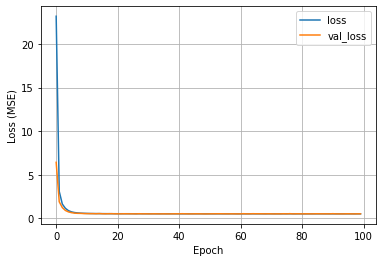

In [154]:
plot_loss(history_tuned) # epoch vs loss graph

In [155]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=11, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 20)                240       
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 21        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [156]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=15)

Epoch 1/100
262/262 [==============================] - 0s 1ms/step - loss: 23.3154 - val_loss: 9.1127
Epoch 2/100
262/262 [==============================] - 0s 1ms/step - loss: 4.1398 - val_loss: 2.2839
Epoch 3/100
262/262 [==============================] - 0s 1ms/step - loss: 1.4066 - val_loss: 0.8863
Epoch 4/100
262/262 [==============================] - 0s 1ms/step - loss: 0.7661 - val_loss: 0.6537
Epoch 5/100
262/262 [==============================] - 0s 1ms/step - loss: 0.6394 - val_loss: 0.6051
Epoch 6/100
262/262 [==============================] - 0s 1ms/step - loss: 0.6000 - val_loss: 0.5727
Epoch 7/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5820 - val_loss: 0.5618
Epoch 8/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5714 - val_loss: 0.5558
Epoch 9/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5657 - val_loss: 0.5510
Epoch 10/100
262/262 [==============================] - 0s 1ms/step - loss: 0.5574 - val_l

In [157]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
58,0.537239,0.509126,58
80,0.536646,0.510519,80
93,0.536466,0.510887,93
55,0.536376,0.511095,55
88,0.537087,0.511506,88
...,...,...,...
4,0.639370,0.605115,4
3,0.766130,0.653693,3
2,1.406551,0.886344,2
1,4.139819,2.283875,1


In [158]:
predictions = wider_model_rmsprop.predict(feature_test)

predictions = predictions.flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.5225090858055083
MAE (Mean Absolute Error) 0.565266169820513
r^2 score 0.3150882369295934
RMSE (Root Mean Squared Error 0.7228478994958125


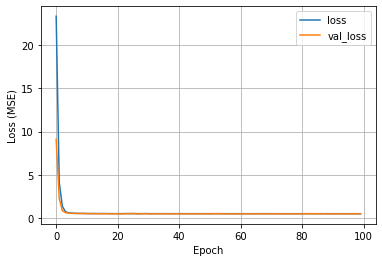

In [159]:
plot_loss(history_rmsprop) # epoch vs loss graph

# Kesimpulan

Hasil terbaik didapatkan pada Model SuperWide dengan hasil Epoch 91
loss: 0.3286 - val_loss: 0.4442 dan nilai r2 score 0.4088